In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize 
import pandas as pd
from collections import Counter
import string
import pickle

[nltk_data] Downloading package punkt to /Users/dkarsann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dkarsann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Parsing and Processing Content

In [4]:
df_en = pd.read_csv('../../processed_files/only_en.csv')
df_en.head()

,DOMAIN,RAW_CONTENT,LANGUAGE
0,x10-hk.com,automation@home » » | | quick find categories ...,en
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en


In [5]:
# do not specify axis as parameter when running lambda on series
df_en['RAW_CONTENT_PARSED'] = df_en['RAW_CONTENT'].apply(lambda row: word_tokenize(row))
df_en.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_PARSED
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation, @, home, », », |, |, quick, find,..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha, powered, by, imunify360, english, hu..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com, currencies, :, rupiah, la..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine, train, (, blogroll, ), |, the, romantic..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands, ,, base, curve, (, bc, ), :, 8.4, ,, ..."


In [6]:
df_en_content_tokens = [item for sublist in df_en['RAW_CONTENT_PARSED'].values for item in sublist]

In [7]:
counts = Counter(df_en_content_tokens)

In [8]:
counts.most_common(10)

[(',', 503415),
 ('.', 424821),
 ('the', 383370),
 ('to', 281473),
 ('and', 265654),
 ('of', 206802),
 ('a', 197159),
 ('in', 150821),
 (')', 143235),
 ('you', 141557)]

In [9]:
df_en_2 = df_en.copy(deep=True)

In [10]:
df_en_2['RAW_CONTENT_PARSED'] = df_en_2['RAW_CONTENT'].apply(lambda row: row.split())
df_en_2.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_PARSED
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation@home, », », |, |, quick, find, cat..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha, powered, by, imunify360, english, hu..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com, currencies:, rupiah, lang..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine, train, (blogroll), |, the, romantic, vi..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands,, base, curve, (bc):, 8.4,, base, curv..."


In [11]:
df_en_2['RAW_CONTENT_PARSED'] = df_en_2['RAW_CONTENT_PARSED'].apply(lambda row: [token.lower() for token in row])
df_en_2.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_PARSED
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation@home, », », |, |, quick, find, cat..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha, powered, by, imunify360, english, hu..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com, currencies:, rupiah, lang..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine, train, (blogroll), |, the, romantic, vi..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands,, base, curve, (bc):, 8.4,, base, curv..."


In [12]:
print(string.punctuation)
table = str.maketrans('', '', string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
table = str.maketrans('', '', string.punctuation)
df_en_2_content_tokens = [item for sublist in df_en_2['RAW_CONTENT_PARSED'].values for item in sublist]
#df_en_2_content_tokens

In [14]:
df_en_2_content_tokens_stripped = [w.translate(table) for w in df_en_2_content_tokens]
df_en_2_content_tokens_stripped[:10]

['automationhome', '»', '»', '', '', 'quick', 'find', 'categories', '1', '67']

## Stopwords

In [15]:
counts_2 = Counter(df_en_2_content_tokens_stripped)
#nltk stopword list is 179 words
counts_2.most_common(18)

[('the', 381516),
 ('to', 281249),
 ('and', 265310),
 ('', 227972),
 ('of', 206615),
 ('a', 196801),
 ('in', 150442),
 ('you', 130155),
 ('for', 118715),
 ('is', 114845),
 ('i', 101680),
 ('your', 92100),
 ('that', 84403),
 ('on', 83377),
 ('with', 75019),
 ('it', 68168),
 ('this', 67572),
 ('are', 67458)]

In [16]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
len(stopwords.words('english'))

179

In [18]:
#counts_2.most_common(179)

In [19]:
common_stopwords = set(stopwords.words('english'))

In [20]:
corpus_stopwords = set([i[0] for i in counts_2.most_common(179)])

In [21]:
in_both_lists = common_stopwords.intersection(corpus_stopwords)

In [22]:
len(in_both_lists)

83

In [23]:
list(in_both_lists)[:10]

['her', 'up', 'being', 'are', 'over', 'a', 'and', 'more', 'who', 'very']

## Heaps' Law

In [24]:
df_en_2.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_PARSED
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation@home, », », |, |, quick, find, cat..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha, powered, by, imunify360, english, hu..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com, currencies:, rupiah, lang..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine, train, (blogroll), |, the, romantic, vi..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands,, base, curve, (bc):, 8.4,, base, curv..."


In [25]:
df_en_2_new = df_en_2.reset_index()
df_en_2_new = df_en_2_new.drop(columns=['index'])
df_en_2_new.head()

,DOMAIN,RAW_CONTENT,LANGUAGE,RAW_CONTENT_PARSED
0,x10-hk.com,automation@home » » | | quick find categories ...,en,"[automation@home, », », |, |, quick, find, cat..."
1,hupshenghware.com,captcha powered by imunify360 english hupsheng...,en,"[captcha, powered, by, imunify360, english, hu..."
2,soponyonosnack.com,soponyonosnack.com currencies: rupiah language...,en,"[soponyonosnack.com, currencies:, rupiah, lang..."
3,theromanticvineyard.com,wine train (blogroll) | the romantic vineyard ...,en,"[wine, train, (blogroll), |, the, romantic, vi..."
4,eopticians.co.uk,"brands, base curve (bc): 8.4, base curve (bc):...",en,"[brands,, base, curve, (bc):, 8.4,, base, curv..."


In [26]:
# number of documents processed, number of unique 
num_docs_num_unique = [(0,0)]
unique = set()
for index,row in df_en_2_new.iterrows():
    unique.update(row['RAW_CONTENT_PARSED'])
    num_docs = index + 1
    num_unique = len(unique)
    num_docs_num_unique.append((num_docs, num_unique))

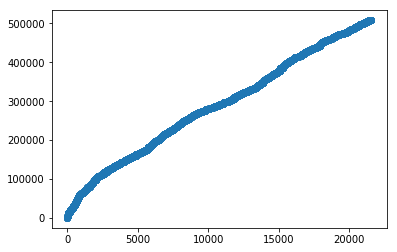

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y = zip(*num_docs_num_unique)
plt.scatter(x, y)
plt.show()

In [28]:
most_to_least = sorted(counts_2.items(), key=lambda item: item[1], reverse=True)
most_to_least_plot_items = []
for index, item in enumerate(most_to_least):
    most_to_least_plot_items.append((index, item[1]))

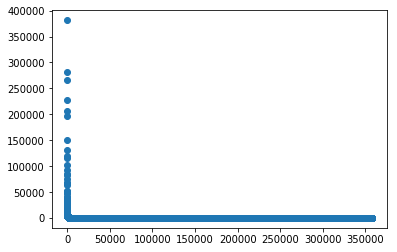

In [29]:
x, y = zip(*most_to_least_plot_items)
plt.scatter(x, y)
plt.show()

## Zipf's Law

In [30]:
most_to_least_2 = sorted(counts_2.items(), key=lambda item: item[1], reverse=True)
most_to_least_plot_items_2 = []
for index, item in enumerate(most_to_least):
    if index < 20:
        continue
    if index >= 500:
        break
    most_to_least_plot_items_2.append((index, item[1]))

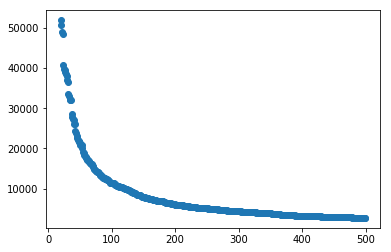

In [31]:
x2, y2 = zip(*most_to_least_plot_items_2)
plt.scatter(x2, y2)
plt.show()

In [32]:
#most_to_least_plot_items_2

## Stopword lists

In [33]:
common_stopwords = set(stopwords.words('english'))

In [34]:
with open('../../processed_files/common_stopwords.pickle', 'wb') as file:
    pickle.dump(common_stopwords, file)

In [35]:
corpus_stopwords = set([i[0] for i in counts_2.most_common(100)])

In [36]:
with open('../../processed_files/corpus_stopwords.pickle', 'wb') as file:
    pickle.dump(corpus_stopwords, file)

In [37]:
combined_stopwords = common_stopwords.union(corpus_stopwords)

In [38]:
with open('../../processed_files/combined_stopwords.pickle', 'wb') as file:
    pickle.dump(combined_stopwords, file)